prototype function to visualize transfer functions like y = f(x1, x2, x3) and y = g(x1, x2, x3) one-at-a-time for project (tidyworkflow communicate step)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x1, x2, x3):
    return x1 ** 2 + np.log(x2) + np.sqrt(x3)

In [3]:
# test
f(0.5, 1, 0.5)

0.9571067811865476

In [4]:
def g(x1, x2, x3):
    return np.log(x1) + np.sqrt(x2) + x3 ** 2

In [5]:
# test
g(0.5, 1, 0.5)

0.5568528194400547

In [6]:
A = np.linspace(0, 1, 100)
B = np.linspace(0, 1, 100)
C = np.linspace(0, 1, 100)

# define design space: dspace
dspace = pd.DataFrame([A, B, C]).T
dspace.columns = ['A', 'B', 'C']
dspace['A_fixed'] = 0.5
dspace['B_fixed'] = 1
dspace['C_fixed'] = 0.5
dspace.head()

,A,B,C,A_fixed,B_fixed,C_fixed
0,0.000000,0.000000,0.000000,0.5,1,0.5
1,0.010101,0.010101,0.010101,0.5,1,0.5
2,0.020202,0.020202,0.020202,0.5,1,0.5
3,0.030303,0.030303,0.030303,0.5,1,0.5
4,0.040404,0.040404,0.040404,0.5,1,0.5


In [7]:
dspace['f_A'] = f(dspace['A'], dspace['B_fixed'], dspace['C_fixed'])
dspace['f_B'] = f(dspace['A_fixed'], dspace['B'], dspace['C_fixed'])
dspace['f_C'] = f(dspace['A_fixed'], dspace['B_fixed'], dspace['C'])

dspace['g_A'] = g(dspace['A'], dspace['B_fixed'], dspace['C_fixed'])
dspace['g_B'] = g(dspace['A_fixed'], dspace['B'], dspace['C_fixed'])
dspace['g_C'] = g(dspace['A_fixed'], dspace['B_fixed'], dspace['C'])


/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
dspace.head()

,A,B,C,A_fixed,B_fixed,C_fixed,f_A,f_B,f_C,g_A,g_B,g_C
0,0.000000,0.000000,0.000000,0.5,1,0.5,0.707107,-inf,0.250000,-inf,-0.443147,0.306853
1,0.010101,0.010101,0.010101,0.5,1,0.5,0.707209,-3.638013,0.350504,-3.345120,-0.342643,0.306955
2,0.020202,0.020202,0.020202,0.5,1,0.5,0.707515,-2.944866,0.392134,-2.651973,-0.301013,0.307261
3,0.030303,0.030303,0.030303,0.5,1,0.5,0.708025,-2.539401,0.424078,-2.246508,-0.269070,0.307771
4,0.040404,0.040404,0.040404,0.5,1,0.5,0.708739,-2.251719,0.451008,-1.958825,-0.242140,0.308485


In [9]:
f(0.020408, 1, 0.5)

0.7075232676505476

In [10]:
g(0.020408, 1, 0.5)

-2.641828298142627

In [11]:
f(0.5, 0.020408, 0.5)

-2.9347215169560794

In [12]:
g(0.5, 0.020408, 0.5)

-0.3002906091325167

In [13]:
f(0.5, 1, 0.020408)

0.3928565714274286

In [14]:
g(0.5, 1, 0.020408)

0.3072693059040547

<AxesSubplot:xlabel='A'>

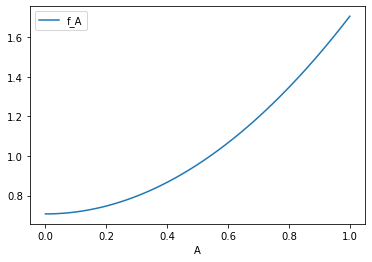

In [15]:
dspace.plot(x='A', y='f_A')

<AxesSubplot:xlabel='B'>

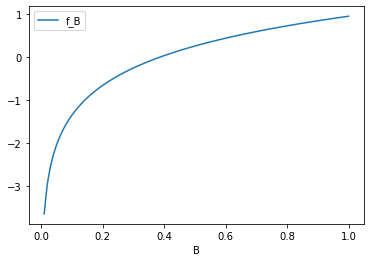

In [16]:
dspace.plot(x='B', y='f_B')

<AxesSubplot:xlabel='C'>

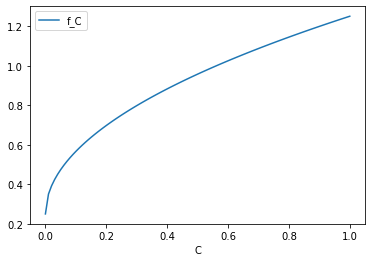

In [17]:
dspace.plot(x='C', y='f_C')

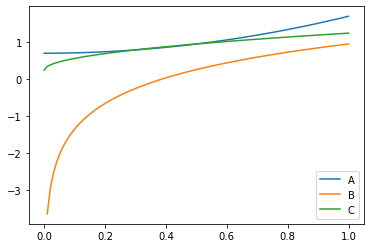

In [18]:
plt.plot(dspace['A'], dspace['f_A'], label='A')
plt.plot(dspace['B'], dspace['f_B'], label='B')
plt.plot(dspace['C'], dspace['f_C'], label='C')
plt.legend()
plt.show()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


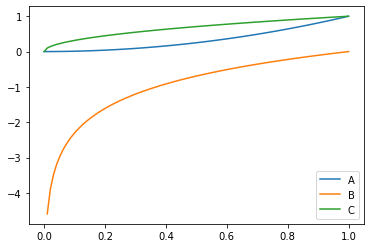

In [19]:
plt.plot(A, A ** 2, label='A')
plt.plot(B, np.log(B), label='B')
plt.plot(C, np.sqrt(C), label='C')
plt.legend()
plt.show()

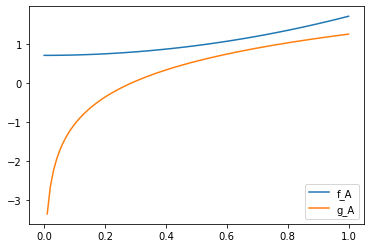

In [20]:
plt.plot(dspace['A'], dspace['f_A'], label='f_A')
plt.plot(dspace['A'], dspace['g_A'], label='g_A')
plt.legend(loc='lower right')
plt.show()

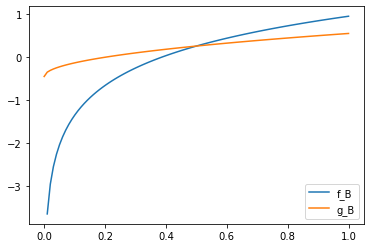

In [21]:
plt.plot(dspace['B'], dspace['f_B'], label='f_B')
plt.plot(dspace['B'], dspace['g_B'], label='g_B')
plt.legend(loc='lower right')
plt.show()

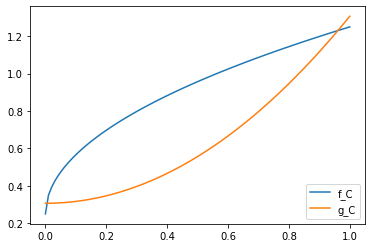

In [22]:
plt.plot(dspace['C'], dspace['f_C'], label='f_C')
plt.plot(dspace['C'], dspace['g_C'], label='g_C')
plt.legend(loc='lower right')
plt.show()